In [8]:
%load_ext autoreload
%autoreload 2

# Data Augmentation for Satellite Images

Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model. It is closely related to oversampling in data analysis.

**Wait! Why do we want to do that?**

To answer this let's take a look at the amount of data we have.

The analysis we are doing is to predict GDP using satellite images. Dataset we have is over the time frame of around 20 years and for a selected number of countries. 
For each year we have one image for each country. 
Now suppose we have selected 20 countries, that gives us just 400 total images in our dataset. Even though we can try and do analysis with only 400 data points, but to use Deep learning models effectively, it would be better if we increase the size of the dataset. This is because deep learning models have to perform feature extraction as well and therefore are data intensive.

Let's load the required libraries and look at the images we have.

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import pathlib
import os
import matplotlib.pyplot as plt
from plotnine import *
import re

In [2]:
os.chdir(pathlib.Path("." , ".." , ".."))
os.getcwd()

'C:\\Users\\Abhijeet\\Documents\\GitHub\\dsba4152'

In [9]:
from dsba4152.utils.helpers import Helpers

Let's use our helper function to read all images we have for india

In [52]:
india, years = Helpers().read_country_all_years("IND")

In [26]:
len(india)

18

In [63]:
years

['1992',
 '1993',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011']

We see that the data we have is for 18 years. Let's look at how big each image is.

In [55]:
india[0].read(1).shape

(3693, 3797)

The images at hand are pretty high dimensional. Let's visualize each of them.

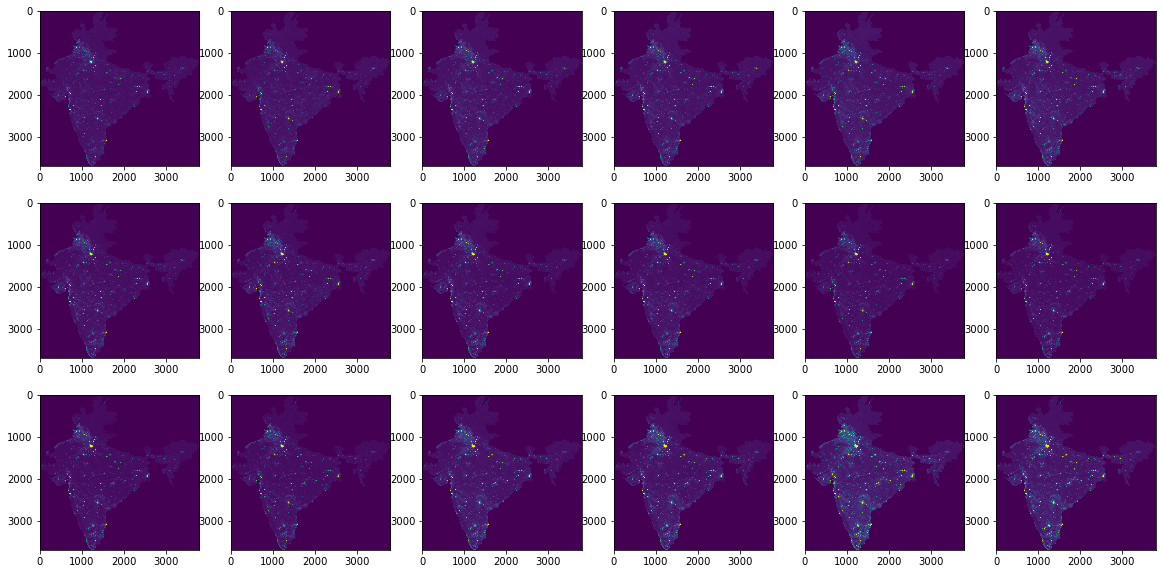

In [51]:
fig,ax = plt.subplots(3,6 , figsize=(20,10))

for i,img in enumerate(india):
    ax[int(i / 6)][int(i % 6)].imshow(img.read(1))

Now we shift to [Keras](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) and use it's helper method to generate augmented data for a particular image.

We use the ImageDataGenerator from Keras.
`from keras.preprocessing.image import ImageDataGenerator`

The `ImageDataGenerator` can apply
1. Rotation
2. Horizontal Shift
3. Vertical Shift
4. Shear
5. Zooming
6. Horizontal Flip

This is a great way to take the data at hand and generate more and more images from it randomly.

For Satellite images and specifically in our case, we have to be a bit more cautious about the transforms that we use. For exaple Horizontal/Vertical shifts can move regions out of the image or compress them, since we care about all the ligth intensities, loss of regions would mean loss of information. Therefore we decide to do only rotation and horizontal filp. Even these two can help generate more data.

Let's apply the transformations to just one image and take a look at the outputs

In [62]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        #shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
  # this is a Numpy array with shape (3, 150, 150)

x = img_to_array(india[0].read(1))
#x = x.reshape((1,) + x.shape)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break

In [71]:
images = [plt.imread("preview/"+ f) for f in os.listdir("preview")]

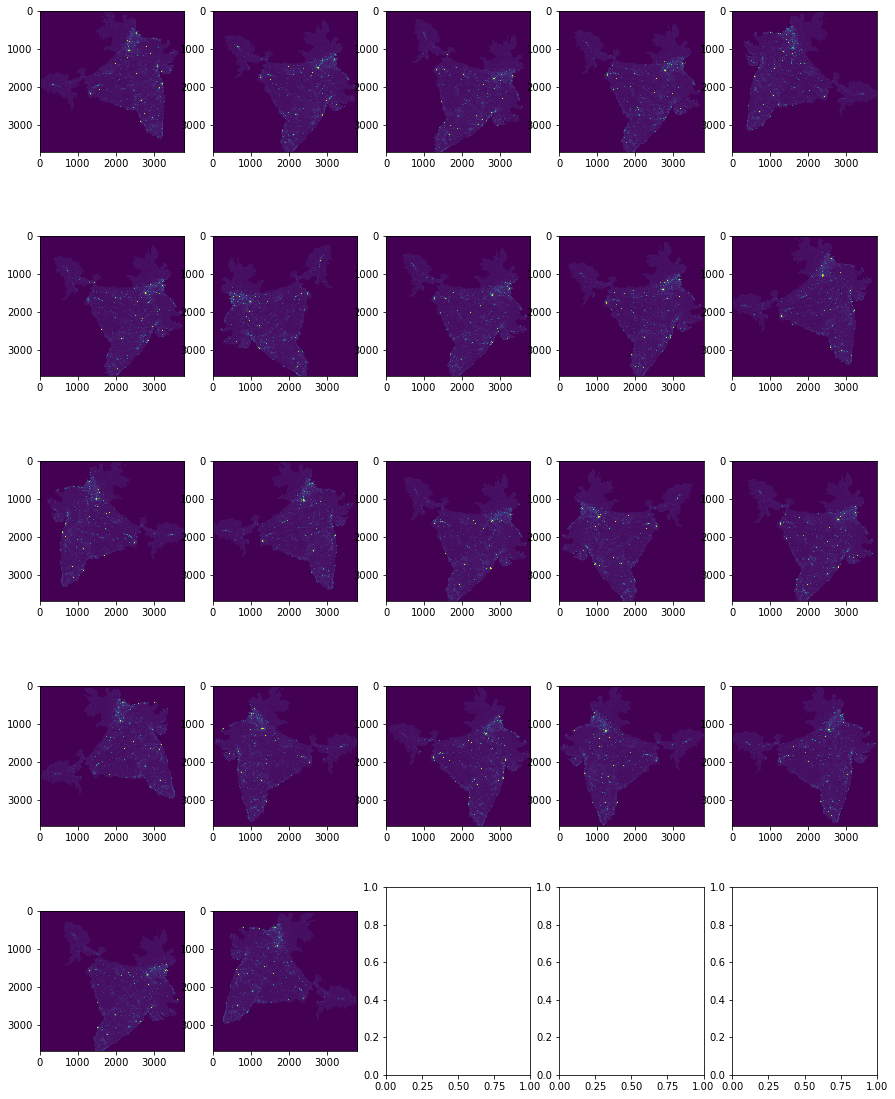

In [74]:
fig , ax = plt.subplots(5,5 , figsize=(15,20))
for i,img in enumerate(images):
    ax[int(i / 5)][int(i % 5)].imshow(img)

Great! Now, depending on how strong your geo intuition is, you might be able to still figure out what's what in the above images. But for our purposes we have generated 20 images from a single image. That will scale our 400 image dataset to 8000 image dataset!